In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [109]:
df = pd.read_csv(r"C:\Users\ts-sachin.bhumihar\Downloads\train_u6lujuX_CVtuZ9i.csv")

In [110]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [111]:
df.shape

(614, 13)

In [112]:
df.shape

(614, 13)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [114]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [115]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [116]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [117]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [118]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [119]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [120]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [121]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [122]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [124]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [209]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
# Droping unused column
df.drop(columns = 'Loan_ID', inplace = True)

In [126]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [127]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [128]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
df.shape

(614, 12)

In [130]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

# Handling Categorical data into Numerical data

In [131]:
# Handling Categorical data into numerical
df['Gender'] = df['Gender'].map({'Female' : 0, 'Male' : 1})

In [132]:
df.dtypes

Gender               float64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [133]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [134]:
df['Married'] = df['Married'].map({'No' : 0, 'Yes' : 1})

In [135]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [136]:
df['Dependents'] = df['Dependents'].map({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})

In [137]:
df.dtypes


Gender               float64
Married              float64
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [138]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [139]:
df['Education'] = df['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})

In [140]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [141]:
df['Self_Employed'] = df['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [142]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [143]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [144]:
df['Property_Area'] = df['Property_Area'].map({'Urban' : 0, 'Rural' : 1, 'Semiurban' : 2})

In [145]:
df['Property_Area'].value_counts()

2    233
0    202
1    179
Name: Property_Area, dtype: int64

In [146]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [147]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [148]:
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1, 'N' : 0})

In [149]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [150]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Handling Missign value

In [151]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
df['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [158]:
df['Gender'].mode()[0]

1.0

In [156]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [157]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
df['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [160]:
df['Married'].mode()[0]

1.0

In [161]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [162]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [163]:
df['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [164]:
df['Dependents'].mean()

0.7629382303839732

In [165]:
df['Dependents'].mode()[0]

0.0

In [166]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [167]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
df['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [169]:
df['Self_Employed'].mode()[0]

0.0

In [170]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [171]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [172]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [173]:
df['LoanAmount'].mean()

146.41216216216216

In [174]:
df['LoanAmount'].median()

128.0

In [175]:
df['LoanAmount'].mode()

0    120.0
dtype: float64

In [176]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [177]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [179]:
df['Loan_Amount_Term'].mean()

342.0

In [180]:
df['Loan_Amount_Term'].median()

360.0

In [181]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [182]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [184]:
df['Credit_History'].mode()[0]

1.0

In [185]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [186]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling outlier

In [187]:
import seaborn as sns
from pandas_profiling import ProfileReport

<AxesSubplot:>

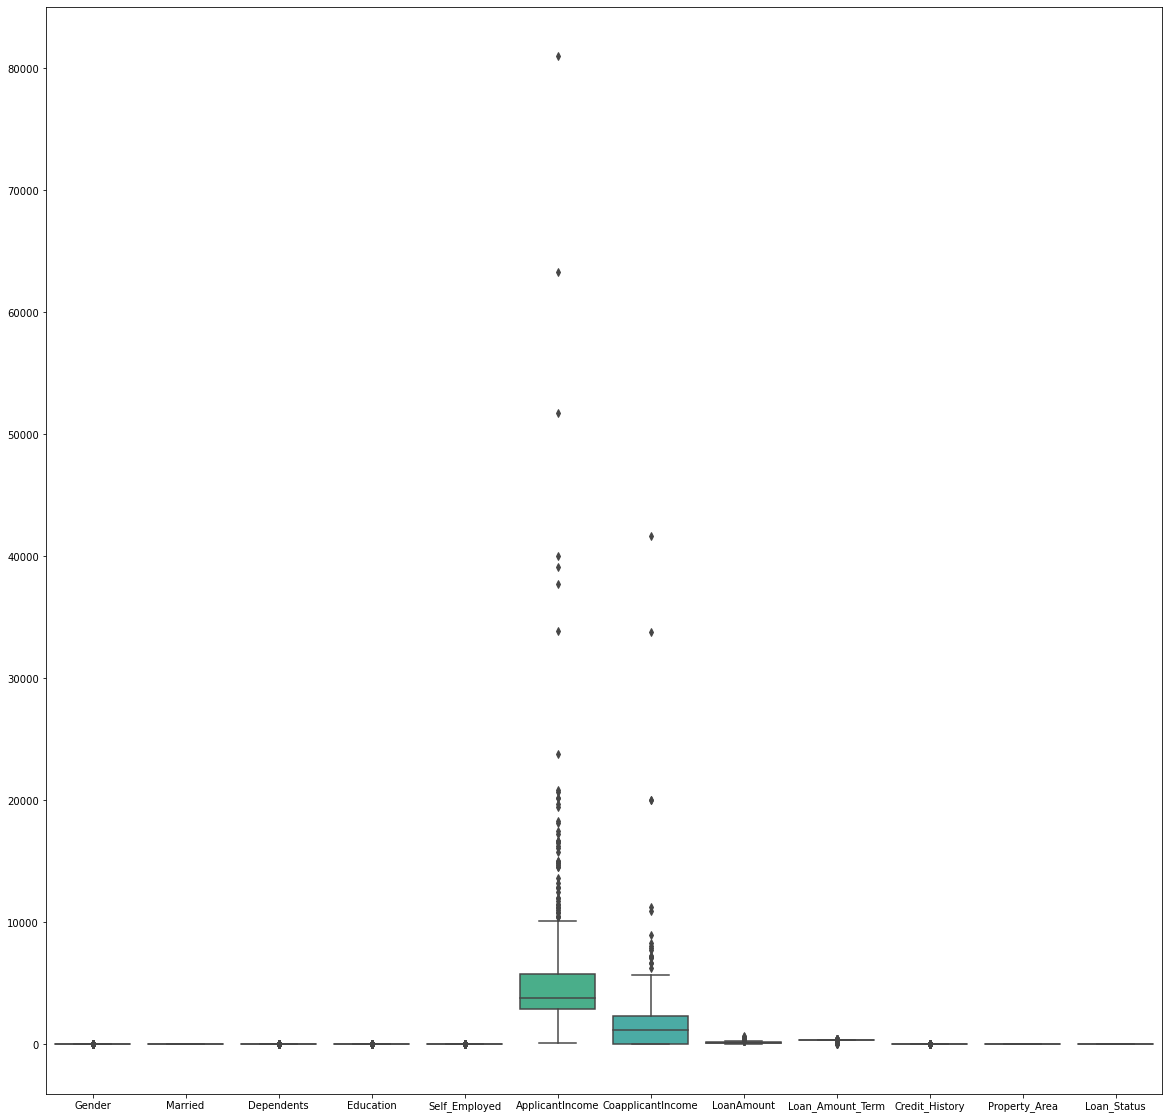

In [190]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [191]:
df.head(1)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0          1            0.0             5849   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   

   Property_Area  Loan_Status  
0              0            1

In [192]:
q = df['ApplicantIncome'].quantile(0.95)
df_new = df[df['ApplicantIncome']<q]

In [193]:
q = df_new['CoapplicantIncome'].quantile(0.98)
df = df_new[df_new['CoapplicantIncome'] < q]

<AxesSubplot:>

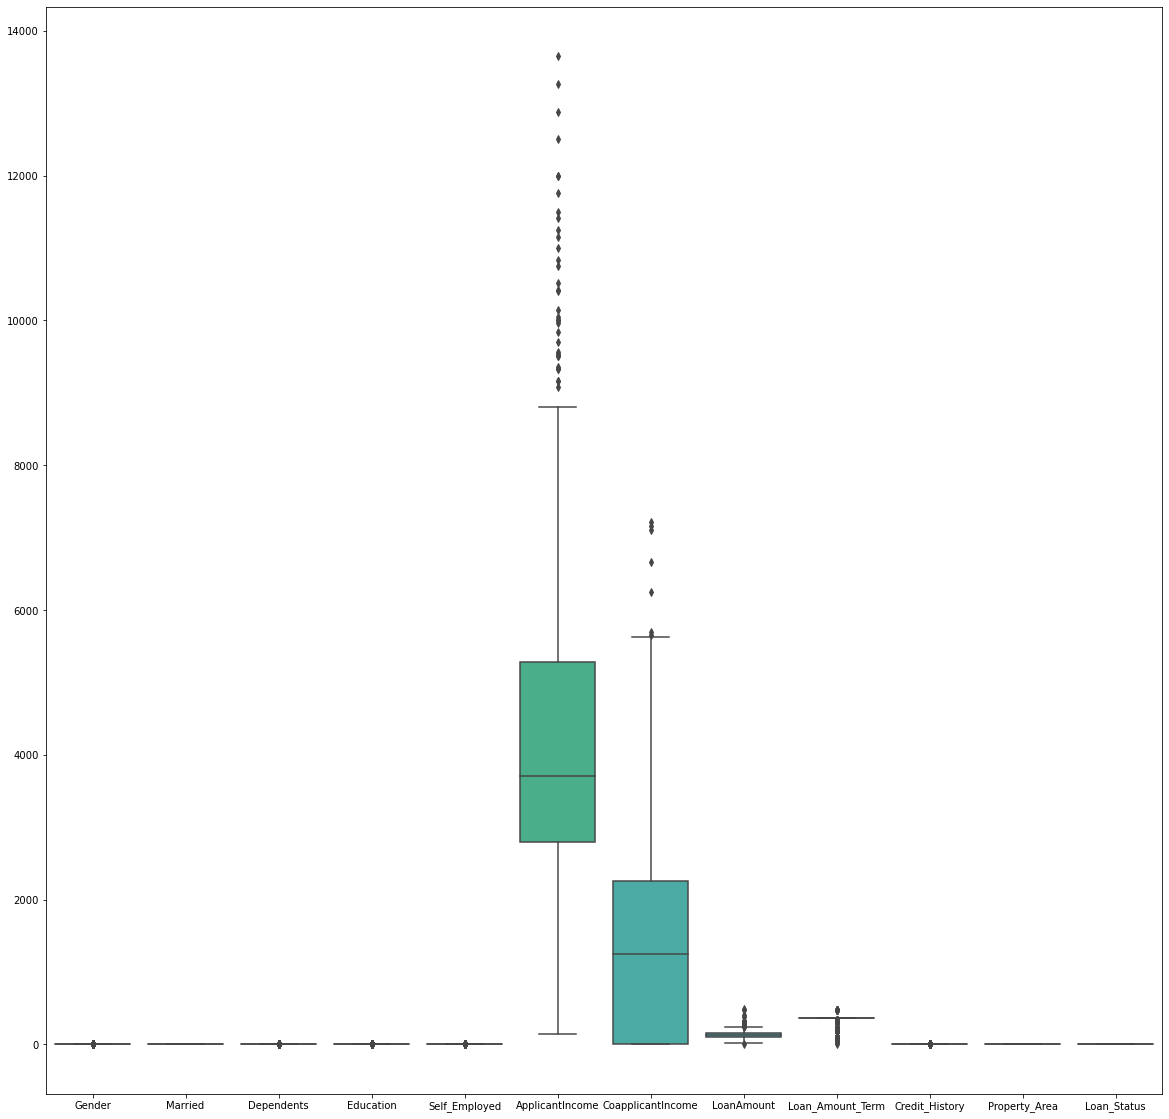

In [194]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [195]:
df.shape

(570, 12)

In [196]:
q = df['ApplicantIncome'].quantile(0.98)
df = df[df['ApplicantIncome']<q]

<AxesSubplot:>

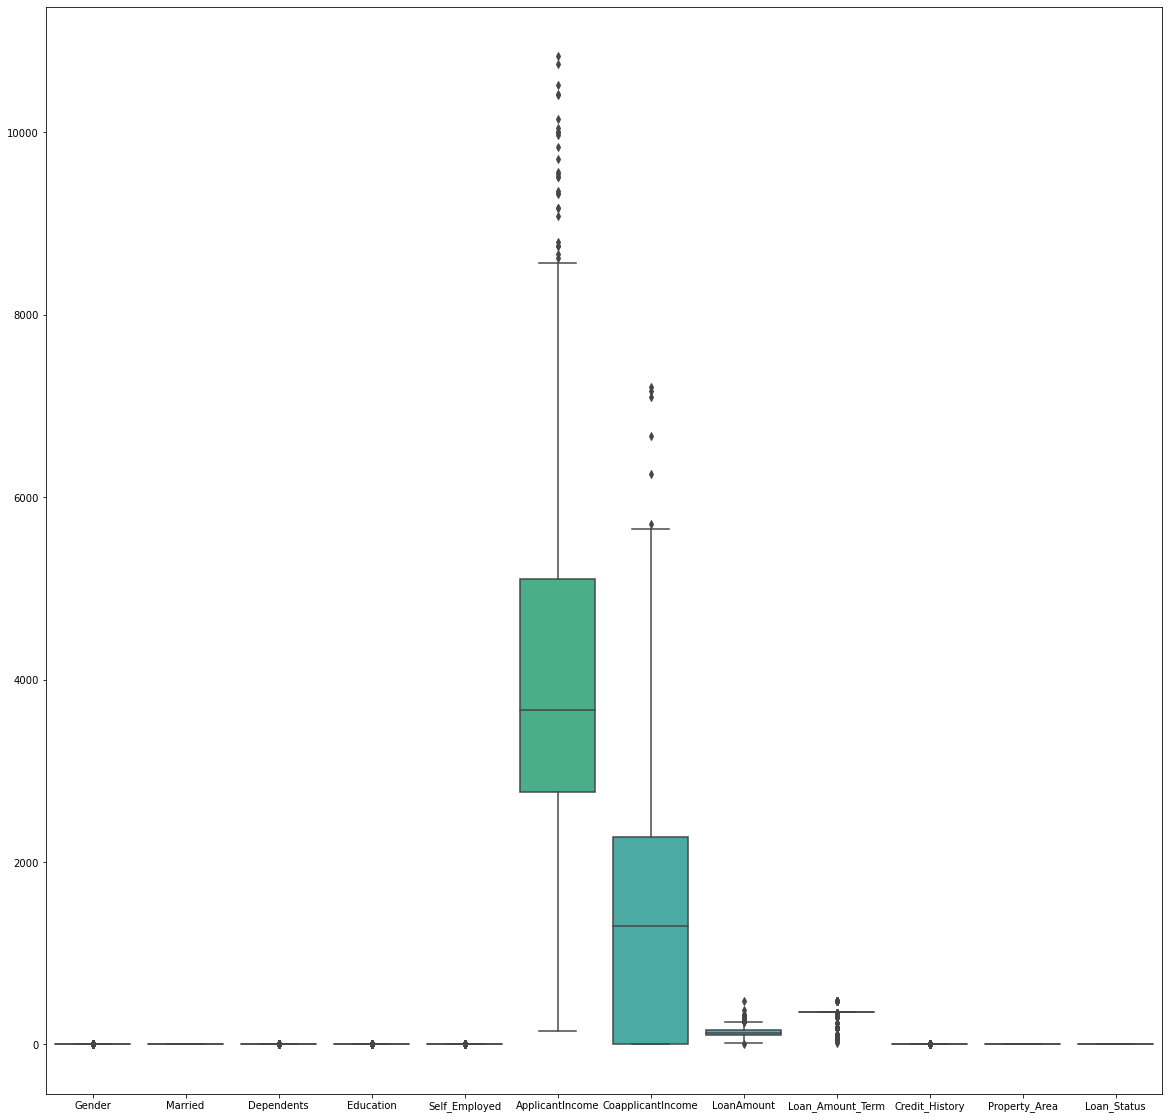

In [197]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [198]:
df.shape

(558, 12)

In [199]:
q = df['ApplicantIncome'].quantile(0.98)
df = df[df['ApplicantIncome']<q]

In [200]:
q = df['CoapplicantIncome'].quantile(0.99)
df = df[df['CoapplicantIncome']<q]

<AxesSubplot:>

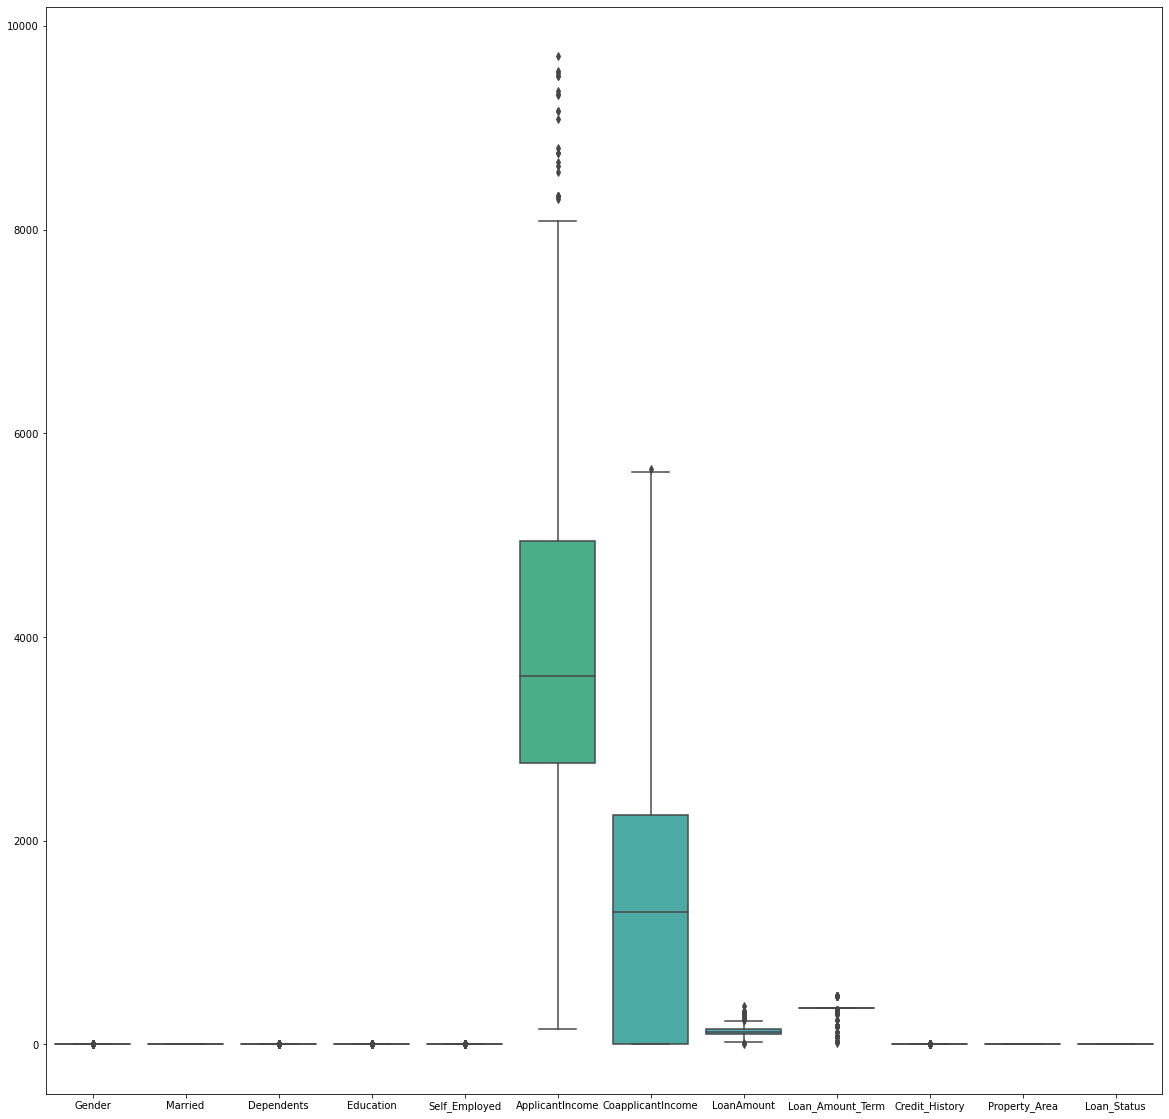

In [201]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [202]:
df.shape

(540, 12)

In [203]:
q = df['ApplicantIncome'].quantile(0.97)
df = df[df['ApplicantIncome']<q]

<AxesSubplot:>

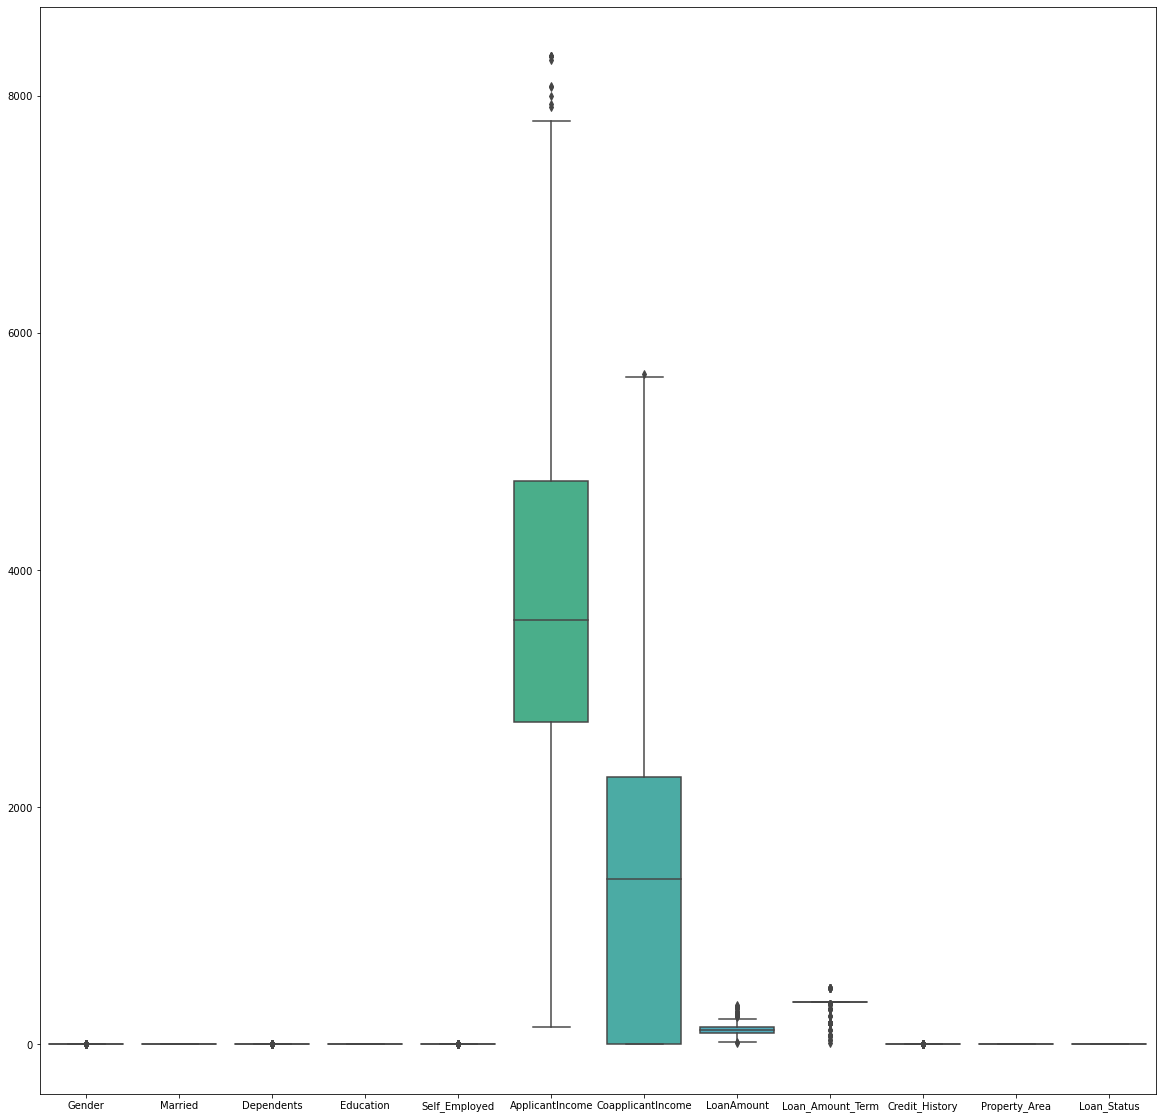

In [204]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [205]:
df.shape

(523, 12)

In [206]:
q = df['Loan_Amount_Term'].quantile(0.98)
df = df[df['Loan_Amount_Term']<q]

<AxesSubplot:>

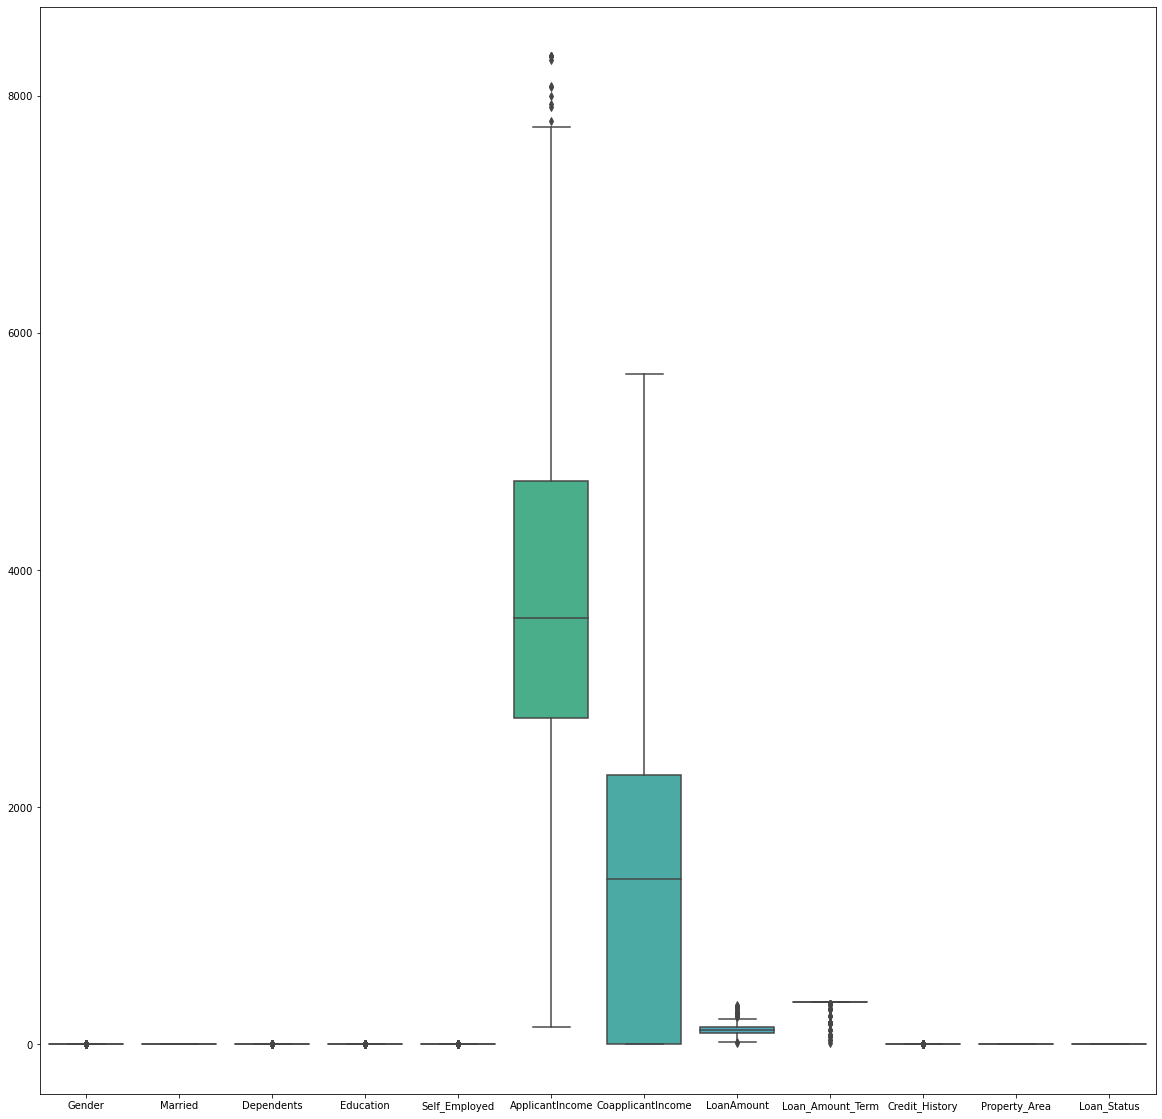

In [207]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [208]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [210]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0          1            0.0             5849   
1     1.0      1.0         1.0          1            0.0             4583   
2     1.0      1.0         0.0          1            1.0             3000   
3     1.0      1.0         0.0          0            0.0             2583   
4     1.0      0.0         0.0          1            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              0            1  
1              1            0  
2              0            1  
3              0            1  
4              0            1

In [211]:
x = df.drop(columns = 'Loan_Status')

In [212]:
x.head(2)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0          1            0.0             5849   
1     1.0      1.0         1.0          1            0.0             4583   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   

   Property_Area  
0              0  
1              1

In [213]:
y = df.Loan_Status

In [214]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 509, dtype: int64

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15, random_state=35)

# Decision Tree Model

In [245]:
dt_model = DecisionTreeClassifier()

In [246]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [247]:
dt_model.score(x_test, y_test)

0.8311688311688312

In [248]:
dt_model.score(x_train, y_train)

1.0

In [249]:
parameter_list = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best', 'random'],
    'max_depth' : [5,10,15,12,13,17,20],
    'ccp_alpha' : [0.0, 0.01, 0.05, 0.5,0.7, 0.004, 0.002, 0.56]
}

In [250]:
grid_dt = GridSearchCV(dt_model, param_grid=parameter_list)

In [251]:
grid_dt.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05, 0.5, 0.7, 0.004, 0.002,
                                       0.56],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 12, 13, 17, 20],
                         'splitter': ['best', 'random']})

In [252]:
grid_dt.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 15,
 'splitter': 'random'}

In [253]:
dt_model_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, splitter = 'random', ccp_alpha = 0.01)

In [254]:
dt_model_2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=15,
                       splitter='random')

In [255]:
dt_model_2.score(x_train, y_train)

0.8194444444444444

In [256]:
dt_model_2.score(x_test, y_test)

0.8701298701298701

[Text(372.0, 978.48, 'X[9] <= 0.881\nentropy = 0.871\nsamples = 432\nvalue = [126, 306]'),
 Text(186.0, 761.0400000000001, 'entropy = 0.429\nsamples = 57\nvalue = [52, 5]'),
 Text(558.0, 761.0400000000001, 'X[10] <= 1.872\nentropy = 0.717\nsamples = 375\nvalue = [74, 301]'),
 Text(372.0, 543.6, 'entropy = 0.815\nsamples = 230\nvalue = [58, 172]'),
 Text(744.0, 543.6, 'X[5] <= 4246.19\nentropy = 0.501\nsamples = 145\nvalue = [16, 129]'),
 Text(558.0, 326.1600000000001, 'X[8] <= 118.869\nentropy = 0.351\nsamples = 91\nvalue = [6, 85]'),
 Text(372.0, 108.72000000000003, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(744.0, 108.72000000000003, 'entropy = 0.267\nsamples = 88\nvalue = [4, 84]'),
 Text(930.0, 326.1600000000001, 'entropy = 0.691\nsamples = 54\nvalue = [10, 44]')]

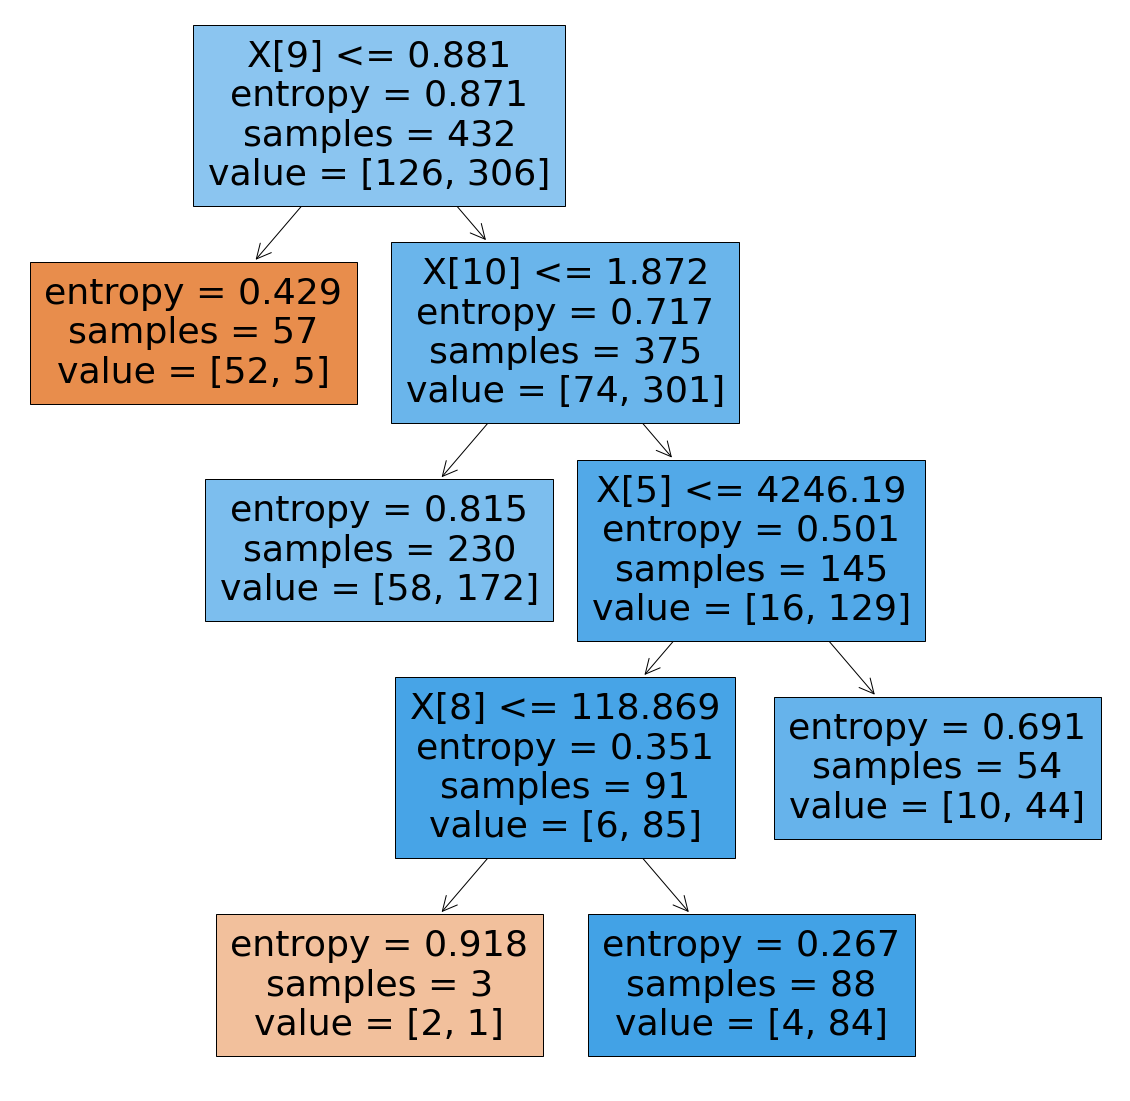

In [257]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_2, filled = True)

In [258]:
test_data = pd.read_csv(r"C:\Users\ts-sachin.bhumihar\Downloads\test_Y3wMUE5_7gLdaTN.csv")

In [259]:
test_data.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban

In [260]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [261]:
test_data.drop(columns = 'Loan_ID', inplace = True)

In [262]:
test_data

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Male     Yes          0      Graduate            No             5720   
1     Male     Yes          1      Graduate            No             3076   
2     Male     Yes          2      Graduate            No             5000   
3     Male     Yes          2      Graduate            No             2340   
4     Male      No          0  Not Graduate            No             3276   
..     ...     ...        ...           ...           ...              ...   
362   Male     Yes         3+  Not Graduate           Yes             4009   
363   Male     Yes          0      Graduate            No             4158   
364   Male      No          0      Graduate            No             3250   
365   Male     Yes          0      Graduate            No             5000   
366   Male      No          0      Graduate           Yes             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0       110.0             360.0             1.0   
1                 1500       126.0             360.0             1.0   
2                 1800       208.0             360.0             1.0   
3                 2546       100.0             360.0             NaN   
4                    0        78.0             360.0             1.0   
..                 ...         ...               ...             ...   
362               1777       113.0             360.0             1.0   
363                709       115.0             360.0             1.0   
364               1993       126.0             360.0             NaN   
365               2393       158.0             360.0             1.0   
366                  0        98.0             180.0             1.0   

    Property_Area  
0           Urban  
1           Urban  
2           Urban  
3           Urban  
4           Urban  
..            ...  
362         Urban  
363         Urban  
364     Semiurban  
365         Rural  
366         Rural  

[367 rows x 11 columns]

In [263]:
test_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [267]:
test_data['Gender'] = test_data['Gender'].map({'Female' : 0, 'Male' : 1})

In [269]:
test_data['Married'] = test_data['Married'].map({'No' : 0, 'Yes' : 1})

In [268]:
test_data['Dependents'] = test_data['Dependents'].map({'0' : 0, '1' : 1, '2' : 2, '3+' : 3})

In [271]:
test_data['Education'] = test_data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})

In [272]:
test_data['Self_Employed'] = test_data['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [273]:
test_data['Property_Area'] = test_data['Property_Area'].map({'Urban' : 0, 'Rural' : 1, 'Semiurban' : 2})

In [276]:
test_data.dtypes

Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [277]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [280]:
test_data['Gender'].mode()[0]

1.0

In [279]:
test_data['Gender'].value_counts()

1.0    286
0.0     70
Name: Gender, dtype: int64

In [281]:
test_data['Gender'] = test_data['Gender'].fillna(test_data['Gender'].mode()[0])

In [282]:
test_data['Dependents'].value_counts()

0.0    200
2.0     59
1.0     58
3.0     40
Name: Dependents, dtype: int64

In [283]:
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])

In [285]:
test_data['Self_Employed'].mode()[0]

0.0

In [284]:
test_data['Self_Employed'].value_counts()

0.0    307
1.0     37
Name: Self_Employed, dtype: int64

In [286]:
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [287]:
test_data['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [288]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(df['LoanAmount'].mean())

In [289]:
test_data['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [290]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [291]:
test_data['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [292]:
test_data['Credit_History'].mode()[0]

1.0

In [293]:
test_data['Credit_History'] = test_data['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [294]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

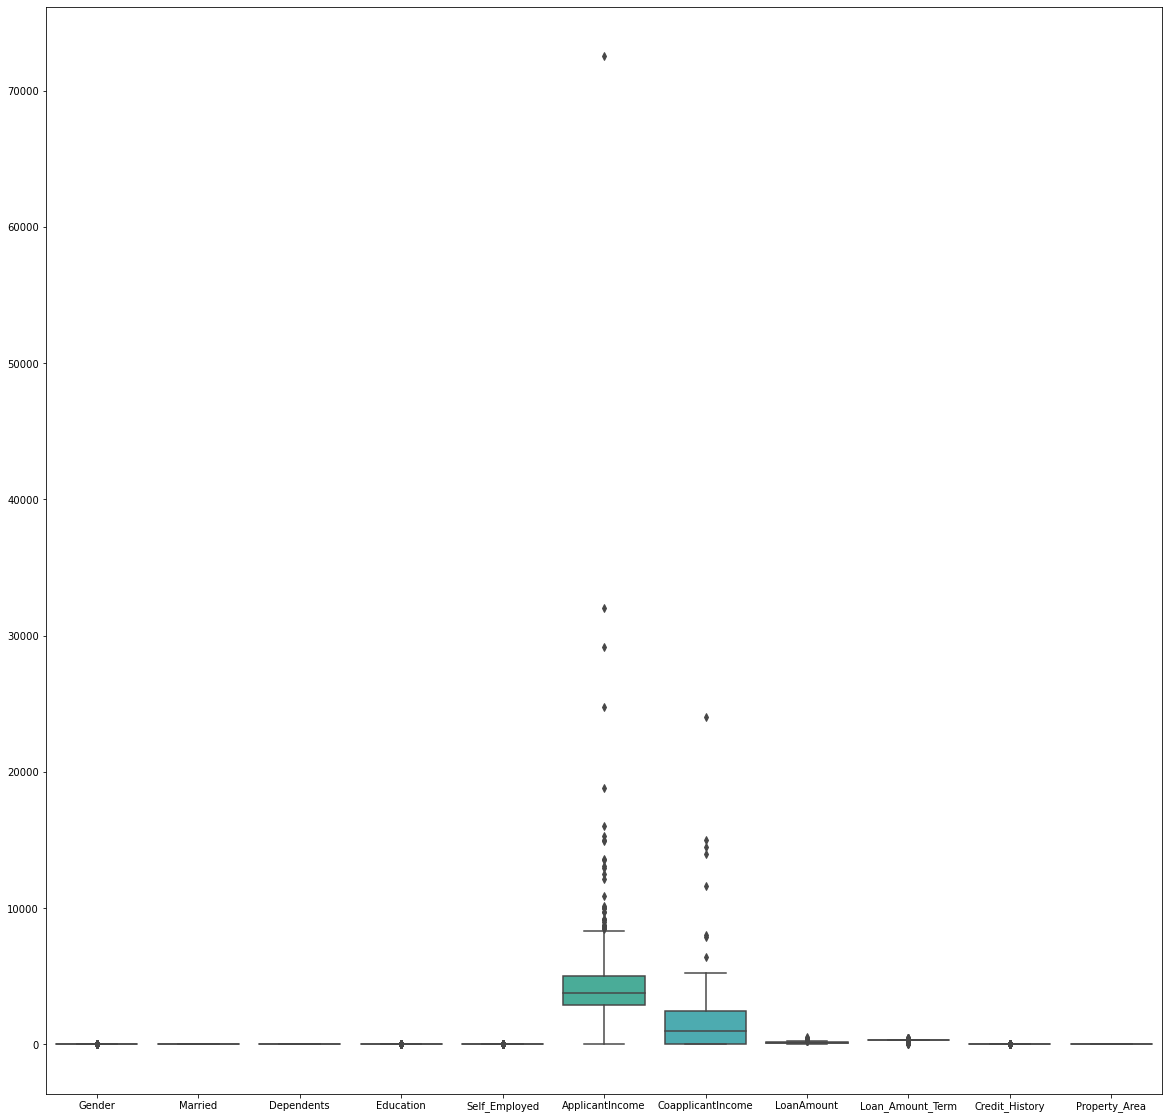

In [296]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = test_data, ax = ax)

In [297]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [301]:
q = test_data['ApplicantIncome'].quantile(0.99)
test_data = test_data[test_data['ApplicantIncome']<q]

In [299]:
q = test_data['CoapplicantIncome'].quantile(0.99)
test_data = test_data[test_data['CoapplicantIncome']<q]

<AxesSubplot:>

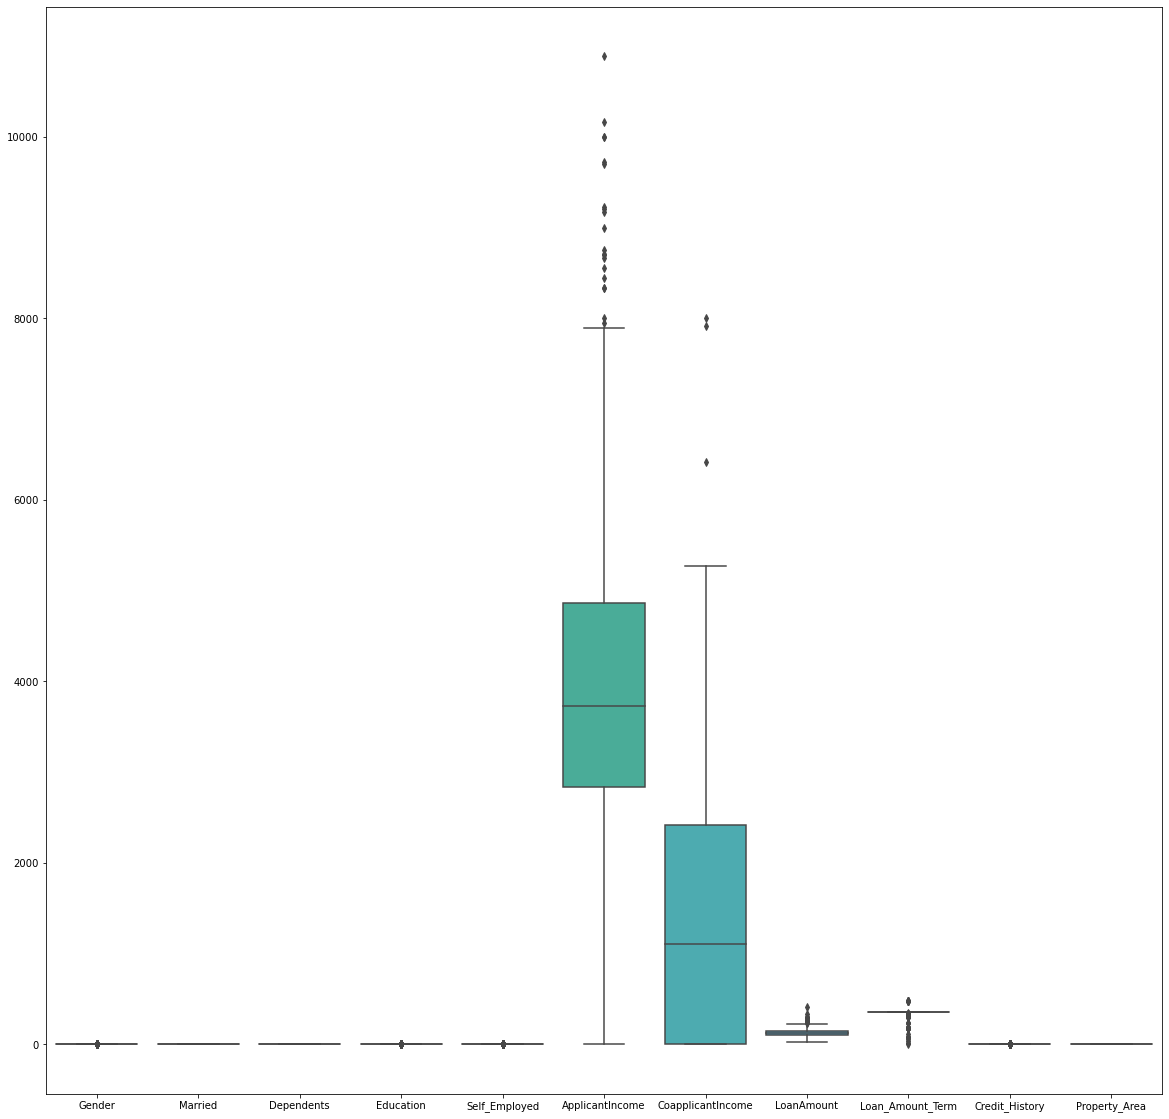

In [302]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = test_data, ax = ax)

In [305]:
predicted_data = dt_model_2.predict(test_data)

In [306]:
predicted_data

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

# Logistic Regression Model

In [309]:
lr_model = LogisticRegression()

In [311]:
lr_model.fit(x_train, y_train)

C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [312]:
lr_model.score(x_test, y_test)

0.8701298701298701

In [313]:
lr_model.score(x_train, y_train)

0.8171296296296297

In [315]:
parameter_list_2  = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [316]:
grid_lr = GridSearchCV(lr_model, param_grid=parameter_list_2)

In [317]:
grid_lr.fit(x_train, y_train)

C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ts-s

C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ts-sachin.bhumihar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [318]:
grid_lr.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [319]:
lr_model_2 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [320]:
lr_model_2.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [321]:
lr_model_2.score(x_train, y_train)

0.8171296296296297

In [322]:
lr_model_2.score(x_test, y_test)

0.8701298701298701

In [324]:
y_predicted = lr_model_2.predict(x_test)

In [325]:
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [326]:
confusion_matrix(y_test, y_predicted)

array([[16, 10],
       [ 0, 51]], dtype=int64)

In [329]:
def model_eval(y_true, y_test):
    tn,fp,fn,tp = confusion_matrix(y_test, y_predicted).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(fp+tn)
    f1_score = 2*(recall*precision)/(recall+precision)
    result = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "Specificity": specificity, 'F1-Score': f1_score}
    return result

In [330]:
model_eval(y_test, y_predicted)

{'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'Specificity': 1.0,
 'F1-Score': 1.0}

In [331]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [332]:
svc_model.score(x_train, y_train)

0.7083333333333334

In [333]:
svc_model.score(x_test, y_test)

0.6623376623376623

In [336]:
parameter_list_3 = {
    'C' : [0.01, 0.1, 1, 0.04, 0.4, 4, 3,2, 0.02, 0.2],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [337]:
grid_svc = GridSearchCV(svc_model, param_grid=parameter_list_3)

In [338]:
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 0.04, 0.4, 4, 3, 2, 0.02, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [339]:
grid_svc.best_params_

{'C': 0.04, 'kernel': 'linear'}

In [340]:
svc_model_2 = SVC(C = 0.04, kernel = 'linear')

In [341]:
svc_model_2.fit(x_train, y_train)

SVC(C=0.04, kernel='linear')

In [342]:
svc_model_2.score(x_train, y_train)

0.8148148148148148

In [343]:
svc_model_2.score(x_test, y_test)

0.8701298701298701